## Leaning outcomes
1. Intro of kNN (simple , non-parametric ML model), purpose: classification and regression
2. HOG as image feature descriptor
3. Demo / example of training ML model

## setup

In [2]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

if not cv.useOptimized():
    cv.setUseOptimized(True)
    cv.useOptimized()

## How does kNN work?

The prediction: [[1.]]
labels of 3 neighbour: [[1. 1. 1.]]
The square distance: [[160. 200. 325.]]


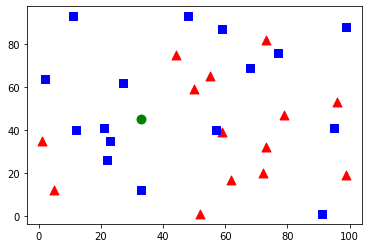

In [8]:
#for reproducibility
np.random.seed(99)

#create a random sample of data(30 samples) bivariate
train_data = np.random.randint(0, 100, size=(30, 2)).astype(np.float32)
targets = np.random.randint(0, 2, size=(30, 1)).astype(np.float32)

#subset the data (target 0)
red = train_data[targets.flatten() == 0]
plt.scatter(red[:, 0], red[:, 1], s=80, marker="^", c="r")

#subset the data (target 1)
blue = train_data[targets.flatten() == 1]
plt.scatter(blue[:, 0], blue[:, 1], s=80, marker="s", c="b")

#new data
new_data = np.random.randint(0, 100, size=(1, 2)).astype(np.float32)
plt.scatter(new_data[:, 0], new_data[:, 1], s=80, marker="o", c="g")

#instantiate kNN object with opencv
knn = cv.ml.KNearest_create()
knn.train(train_data, cv.ml.ROW_SAMPLE, targets)
ret, pred, label_neighbour, dist = knn.findNearest(new_data, 3)

print(f"The prediction: {pred}")
print(f"labels of 3 neighbour: {label_neighbour}")
print(f"The square distance: {dist}")

plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
#instant the knn object
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(train_data, targets.flatten())
knn.predict(new_data)

array([1.], dtype=float32)

In [11]:
knn.kneighbors(new_data)

(array([[12.64911064, 14.14213562, 18.02775638]]),
 array([[17,  5, 14]], dtype=int64))

In [13]:
dist, idx_neighbours = knn.kneighbors(new_data)

targets[idx_neighbours]

array([[[1.],
        [1.],
        [1.]]], dtype=float32)

## try to train ML model (kNN) with synthetic data (fashion mnist data)

In [17]:
sys.path

['C:\\Users\\fict\\Desktop\\week 10',
 'C:/Users/fict/Desktop/week 10/fashion-mnist-master/fashion-mnist-master/utils',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310',
 '',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\fict\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin']

In [16]:
# we need to put the mnist folder path into sys.path list
sys.path.insert(1, "C:/Users/fict/Desktop/week 10/fashion-mnist-master/fashion-mnist-master/utils")

In [20]:
import mnist_reader

X_train, y_train = mnist_reader.load_mnist('./fashion-mnist-master/fashion-mnist-master/data/fashion', kind="train")
X_test, y_test = mnist_reader.load_mnist('./fashion-mnist-master/fashion-mnist-master/data/fashion', kind="t10k")

In [21]:
print(f"The shape of X_train: {X_train.shape}")

The shape of X_train: (60000, 784)


60000 is the number of samples, 784 is the features. 28^2 is equal to 784. The image is shape of 28 x 28. 784 is pixel values for each image

In [24]:
# find the best k, number of nearest neighbour
shuffle_idx = np.random.permutation(len(X_train))
n_samples = int(0.1 * len(X_train))
X_train_part = X_train[shuffle_idx[:n_samples]]
y_train_part = y_train[shuffle_idx[:n_samples]]

In [25]:
from sklearn.model_selection import cross_val_score # cross validation accuracy

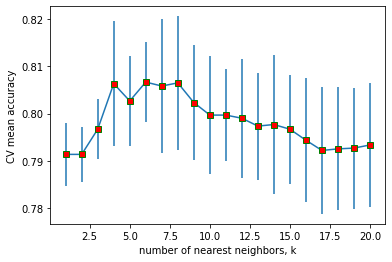

In [32]:
# hy
k_list = np.arange(1, 21)

mean_acc = []
std_acc = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, X_train_part, y_train_part, cv=5)
    mean_acc.append(scores.mean())
    std_acc.append(scores.std())
    
#construct error bar
plt.errorbar(k_list, mean_acc, std_acc, marker="s", mec="g", mfc="r")
plt.xlabel("number of nearest neighbors, k")
plt.ylabel("CV mean accuracy")
plt.show()

In [26]:
import time

In [38]:
k_opt = k_list[np.argmax(mean_acc)]

start = time.time()

knn = KNeighborsClassifier(n_neighbors=k_opt, n_jobs=-1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(f"The execusion time for the training and prediction: {time.time() - start}")

The execusion time for the training and prediction: 12.122790336608887


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [35]:
class_labels = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Snealer", "Bag", "Ankle Boot"]

In [39]:
print(classification_report(y_test, pred, target_names=class_labels))

              precision    recall  f1-score   support

  Tshirt/top       0.76      0.87      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.71      0.83      0.77      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.80      0.75      0.77      1000
      Sandal       0.99      0.83      0.91      1000
       Shirt       0.67      0.56      0.61      1000
     Snealer       0.88      0.97      0.92      1000
         Bag       0.97      0.95      0.96      1000
  Ankle Boot       0.91      0.96      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



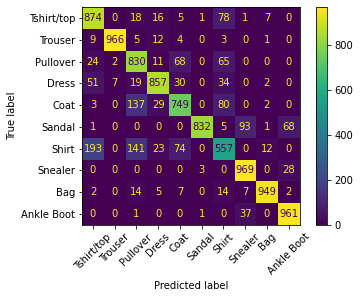

In [40]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_labels)

conf_mat_display.plot()
plt.xticks(rotation=45)
plt.show()

In [41]:
np.sum(conf_mat[:, -4])

836

## HOG + kNN

In [61]:
#parameter of HOG
winSize = (28, 28)
blockSize = (14, 14)
blockStride = (7, 7)
cellSize = (7, 7)
nbins = 9
derivAperture =1
winSigma = -1
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signGradients = True

hog = cv.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins, derivAperture, winSigma, histogramNormType, 
                       L2HysThreshold, gammaCorrection, nlevels, signGradients)

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
# feature
X_train_hog = [hog.compute(x.reshape((28, 28))) for x in X_train]
X_train_hog = np.array(X_train_hog)

scaler = MinMaxScaler()
X_train_hog = scaler.fit_transform(X_train_hog)

In [64]:
X_train_hog.shape

(60000, 324)

In [65]:
X_train_part = X_train_hog[shuffle_idx[:n_samples]]

In [66]:
# hy
k_list = np.arange(1, 21)

mean_acc = []
std_acc = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, X_train_part, y_train_part, cv=5)
    mean_acc.append(scores.mean())
    std_acc.append(scores.std())
    
#construct error bar
plt.errorbar(k_list, mean_acc, std_acc, marker="s", mec="g", mfc="r")
plt.xlabel("number of nearest neighbors, k")
plt.ylabel("CV mean accuracy")
plt.show()

In [67]:
# perform hog feature extraction on test data and normal normalization as wekk 

X_test_hog = [hog.compute(x.reshape((28, 28))) for x in X_test]
X_test_hog = np.array(X_test_hog)
X_test_hog = scaler.transform(X_test_hog)

k_opt = k_list[np.argmax(mean_acc)]

start = time.time()

knn = KNeighborsClassifier(n_neighbors=k_opt, n_jobs=-1)
knn.fit(X_train_hog, y_train)
pred = knn.predict(X_test_hog)
print(f"The execusion time for the training and prediction: {time.time() - start}")

The execusion time for the training and prediction: 1.8439149856567383


In [68]:
print(classification_report(y_test, pred, target_names=class_labels))

              precision    recall  f1-score   support

  Tshirt/top       0.82      0.87      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.81      0.81      1000
       Dress       0.91      0.90      0.90      1000
        Coat       0.77      0.83      0.80      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.69      0.64      0.66      1000
     Snealer       0.94      0.97      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle Boot       0.98      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [69]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_labels)

conf_mat_display.plot()
plt.xticks(rotation=45)
plt.show()

In [54]:
np.diag(conf_mat).sum() / len(y_test)

0.8898

## Build a binary class classifier (kNN) on cats vs dogs dataset

In [70]:
# define a data preprocessor and data loader class
class dataPreprocessor:
    def __init__(self, width, height, inter=cv.INTER_AREA):
        self.width = width
        self.height = height
        self.inter = inter
    def preprocess(self, img):
        return cv.resize(img, (self.width, self.height), interpolation=self.inter)

In [73]:
class dataLoader:
    """By calling load method, we get the data and label array"""
    def __init__(self, preprocessor=None):
        self.preprocessor = preprocessor
        
        if self.preprocessor is None:
            self.preprocessor = []
            
    def load(self, imgPath):
        data = []
        labels = []
        
        for imgName in os.listdir(imgPath):
            filePath = os.path.join(imgPath, imgName)
            img = cv.imread(cv.samples.findFile(filePath))
            label = imgName.split(".")[0]
            
            for p in self.preprocessor:
                img = p.preprocess(img)
                
            data.append(img)
            labels.append(label)
            
        return (np.array(data), np.array(labels))

In [74]:
dataPrep = dataPreprocessor(64, 64)
dataLoad = dataLoader(preprocessor=[dataPrep])
X, y = dataLoad.load("./cats_vs_dogs_small/cats_vs_dogs_small/")

In [75]:
X.shape

(3000, 64, 64, 3)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=500, random_state=400)

In [78]:
X_train.shape

(2500, 64, 64, 3)

In [79]:
import random

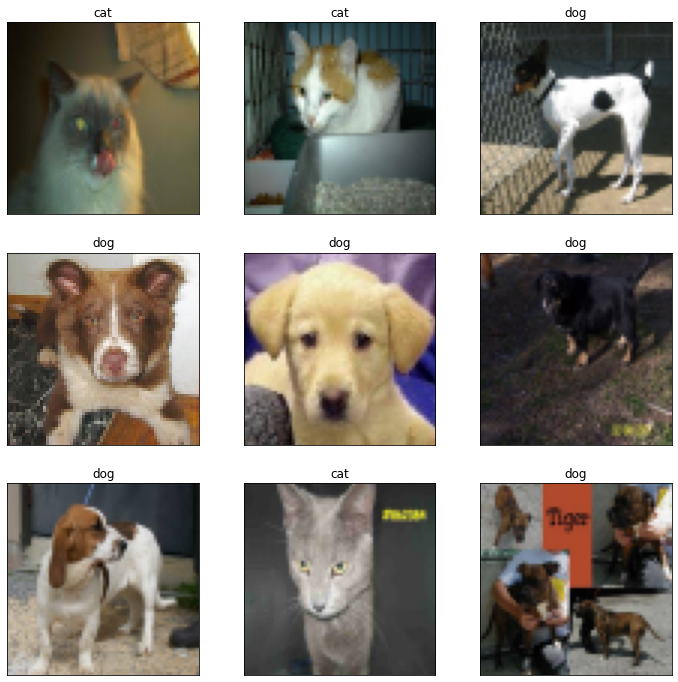

In [80]:
#visualize
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i+1)
    idx = random.randint(0, len(X_train)-1)
    img = cv.cvtColor(X_train[idx], cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.title(y_train[idx])
plt.show()

In [81]:
#parameter of HOG
winSize = (64, 64)
blockSize = (16, 16)
blockStride = (8, 8)
cellSize = (8, 8)
nbins = 9
derivAperture =1
winSigma = -1
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signGradients = False

hog = cv.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins, derivAperture, winSigma, histogramNormType, 
                       L2HysThreshold, gammaCorrection, nlevels, signGradients)

In [82]:
# feature extraction using hog and feature scaling (min max scaler)
X_train_hog = [hog.compute(x) for x in X_train]
X_train_hog = np.array(X_train_hog)

scaler = MinMaxScaler()
X_train_hog = scaler.fit_transform(X_train_hog)

In [84]:
X_train_hog.shape

(2500, 1764)

In [85]:
# hy
k_list = np.arange(1, 21)

mean_acc = []
std_acc = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, X_train_hog, y_train, cv=5)
    mean_acc.append(scores.mean())
    std_acc.append(scores.std())
    
#construct error bar
plt.errorbar(k_list, mean_acc, std_acc, marker="s", mec="g", mfc="r")
plt.xlabel("number of nearest neighbors, k")
plt.ylabel("CV mean accuracy")
plt.show()

In [87]:
# perform hog feature extraction on test data and normal normalization as wekk 

X_test_hog = [hog.compute(x) for x in X_test]
X_test_hog = np.array(X_test_hog)
X_test_hog = scaler.transform(X_test_hog)

k_opt = k_list[np.argmax(mean_acc)]

start = time.time()

knn = KNeighborsClassifier(n_neighbors=k_opt, n_jobs=-1)
knn.fit(X_train_hog, y_train)
pred = knn.predict(X_test_hog)
print(f"The execusion time for the training and prediction: {time.time() - start}")

The execusion time for the training and prediction: 0.02796316146850586


In [88]:
print(classification_report(y_test, pred, target_names=knn.classes_))

              precision    recall  f1-score   support

         cat       0.77      0.44      0.56       250
         dog       0.61      0.87      0.72       250

    accuracy                           0.66       500
   macro avg       0.69      0.66      0.64       500
weighted avg       0.69      0.66      0.64       500



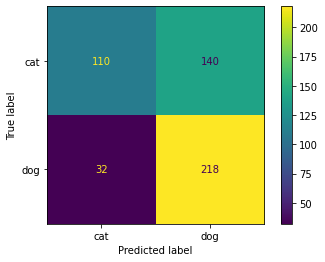

In [89]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=knn.classes_)

conf_mat_display.plot()
#plt.xticks(rotation=45)
plt.show()